### データの取得 & 解凍

In [8]:
#下記の画像の通り、[Restart Kernel Clear ...]を押下し、カーネルを削除
#アウトプットされている表示をクリアしよう（先に出力内容が出てしまっているので）

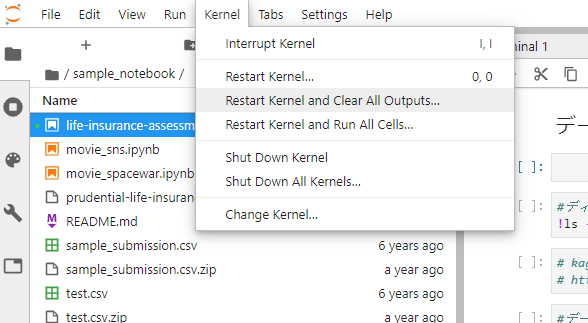

In [2]:
#ディレクトリの確認
!ls -al

total 10904
drwxr-sr-x 4 root 2018    6144 Jun  7 02:08 .
drwxr-sr-x 5 root 2018    6144 Jun  7 00:52 ..
drwxr-sr-x 8 root 2018    6144 Jun  7 00:52 .git
drwxr-sr-x 2 root 2018    6144 Jun  7 02:08 .ipynb_checkpoints
-rw-r--r-- 1 root 2018     138 Jun  7 00:52 README.md
-rw-r--r-- 1 root 2018  166684 Jun  7 02:08 life-insurance-assessment.ipynb
-rw-r--r-- 1 root 2018 9328616 Jun  7 00:52 movie_sns.ipynb
-rw-r--r-- 1 root 2018 1643163 Jun  7 00:52 movie_spacewar.ipynb


In [3]:
# kaggleには事前に登録しておくこと（本日のコンペティション）
# https://www.kaggle.com/c/prudential-life-insurance-assessment/data

In [4]:
#データのダウンロードにあたり、ABEJA CLI コマンドを使用する
# チャンネルIDとファイルIDは当日共有すること
!abeja datalake download --channel_id [write_channel_id] -f [write_file_id] --output_path ./

  0%|                                                     | 0/1 [00:00<?, ?it/s]
prudential:   0%|                                   | 0.00/3.40M [00:00<?, ?B/s]
prudential:  96%|████████████████████████▉ | 3.26M/3.40M [00:00<00:00, 32.5MB/s]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.67it/s]


In [5]:
#ファイルを解凍する
!unzip prudential-life-insurance-assessment.zip

Archive:  prudential-life-insurance-assessment.zip
  inflating: sample_submission.csv.zip  
  inflating: test.csv.zip            
  inflating: train.csv.zip           


In [6]:
#　詳細なファイルを解凍する
!unzip -q sample_submission.csv.zip
!unzip -q train.csv.zip
!unzip -q test.csv.zip

In [7]:
# 回答されたファイルを開いて、内容を覗いてみる

### 課題
ワンクリックで何でも買える時代に、生命保険の申し込みプロセスは時代遅れになっています。  
お客様は、リスク分類や適格性を確認するために、健康診断の予約を含む幅広い情報を提供しますが、そのプロセスには平均30日かかります。  
その結果、人々は保険に興味を失います。そのため、米国では個人向け生命保険に加入している世帯は40％にとどまっています。  
新規・既存を問わず、お客様のプライバシーを守りながら、より早く、より手間をかけずに見積もりを出せるようにしたいと考えています。  
より自動化されたアプローチを用いてリスクを正確に分類する予測モデルを開発することで、業界に対する世間の認識に大きな影響を与えることができます。

### 説明


このデータセットでは，生命保険の申込者の属性を表す100以上の変数が提供されています．  
課題は、テストセットに含まれる各Idの「応答」変数を予測することです。"Response "は，リスクの順序尺度で，8つのレベルがあります．

ファイルの説明
- train.csv - 訓練セット, 応答値を含む  
- test.csv - テストセット、このファイル内のすべての行の Response 変数を予測する必要があります。  
- sample_submission.csv - 正しい形式のサンプル提出ファイル  

|変数|説明|
|:-|:-|
|Id|申請に関連する一意の識別子。|
|Product_Info_1-7|申請された製品に関連する正規化された変数のセット。|
|Ins_Age|正規化された応募者の年齢|
|Ht|申請者の標準化された身長|
|Wt|申請者の体重を正規化したもの|
|BMI|申請者のBMIを正規化したもの|
|Employment_Info_1-6|申請者の職歴に関する正規化された変数の集合。|
|InsuredInfo_1-6|申請者に関する情報を提供する正規化された変数のセット。|
|Insurance_History_1-9|申請者の保険履歴に関する正規化された変数のセット。|
|Family_Hist_1-5|申請者の家族の歴史に関する正規化された変数のセット。|
|Medical_History_1-41|申請者の病歴に関連する正規化された変数の集合である。|
|Medical_Keyword_1-48|申請者に関連する医療キーワードの有無に関するダミー変数のセット。|
|Response|これは対象変数であり、申請に関連する最終決定に関する順序変数である。|


- 下記以降の作業はこちらを参考にして記載。まず情報の可視化を行ってみよう  
https://www.kaggle.com/peteryun/first-prudential
- 目的としては、コードの説明ではなくデータ分析や機械学習における作業工程をおおざっぱにでも理解してもらうためである

### データの可視化

In [9]:
# csvをDataFrameとして取り込み、最初の5行目までを表示
import pandas as pd
train_df = pd.read_csv("./train.csv" )
test_df    = pd.read_csv("./test.csv")

# preview the data
train_df.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,...,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,...,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,...,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,...,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,...,0,0,0,0,0,0,0,0,0,8


In [10]:
#各カラム情報を確認してみる
train_df.info()
train_df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Columns: 128 entries, Id to Response
dtypes: float64(18), int64(109), object(1)
memory usage: 58.0+ MB


Id                      int64
Product_Info_1          int64
Product_Info_2         object
Product_Info_3          int64
Product_Info_4        float64
                       ...   
Medical_Keyword_45      int64
Medical_Keyword_46      int64
Medical_Keyword_47      int64
Medical_Keyword_48      int64
Response                int64
Length: 128, dtype: object

In [11]:
#　カラムが持つ数値の割合などを一発で調べることができる
train_df.describe()

,Id,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
count,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,...,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000
mean,39507.211515,1.026355,24.415655,0.328952,2.006955,2.673599,1.043583,0.405567,0.707283,0.292587,...,0.056954,0.010054,0.045536,0.010710,0.007528,0.013691,0.008488,0.019905,0.054496,5.636837
std,22815.883089,0.160191,5.072885,0.282562,0.083107,0.739103,0.291949,0.197190,0.074239,0.089037,...,0.231757,0.099764,0.208479,0.102937,0.086436,0.116207,0.091737,0.139676,0.226995,2.456833
min,2.000000,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,19780.000000,1.000000,26.000000,0.076923,2.000000,3.000000,1.000000,0.238806,0.654545,0.225941,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
50%,39487.000000,1.000000,26.000000,0.230769,2.000000,3.000000,1.000000,0.402985,0.709091,0.288703,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
75%,59211.000000,1.000000,26.000000,0.487179,2.000000,3.000000,1.000000,0.567164,0.763636,0.345188,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
max,79146.000000,2.000000,38.000000,1.000000,3.000000,3.000000,3.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000


In [12]:
# ↑は表示は省略されているので、すべてのカラムを出力する
pd.set_option('display.max_columns', 127)
train_df.describe()

,Id,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_10,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_15,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_24,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_32,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
count,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59362.000000,59381.000000,59381.000000,52602.000000,59381.000000,48527.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,33985.000000,59381.000000,59381.000000,59381.000000,59381.000000,30725.000000,25140.000000,40197.000000,17570.000000,50492.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,557.000000,59381.000000,59381.000000,59381.000000,59381.000000,14785.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,3801.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,1107.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000
mean,39507.211515,1.026355,24.415655,0.328952,2.006955,2.673599,1.043583,0.405567,0.707283,0.292587,0.469462,0.077582

In [13]:
# カーディナリティを調べる
# カーディナリティとは、ある要素は持つデータ種と理解してもらえればよい
#（性別であれば男性、女性の2種類、血液型であれば、A型B型AB型O型の4種類、性別も血液型もカーディナリティが低い）
# すべて出力したい場合は下記の10を128に変更する
pd.set_option('display.max_rows', 10)
train_df.nunique().sort_values()

Medical_Keyword_24         2
Medical_Keyword_14         2
Medical_History_33         2
Medical_Keyword_33         2
Medical_Keyword_32         2
                       ...  
Product_Info_4          1491
Employment_Info_1       1936
Insurance_History_5     2265
BMI                     3256
Id                     59381
Length: 128, dtype: int64

In [14]:
# ライブラリのインストール(seaborn : グラフィカルな表示をより綺麗に出力できる)
!pip install seaborn

     |████████████████████████████████| 286kB 16.2MB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


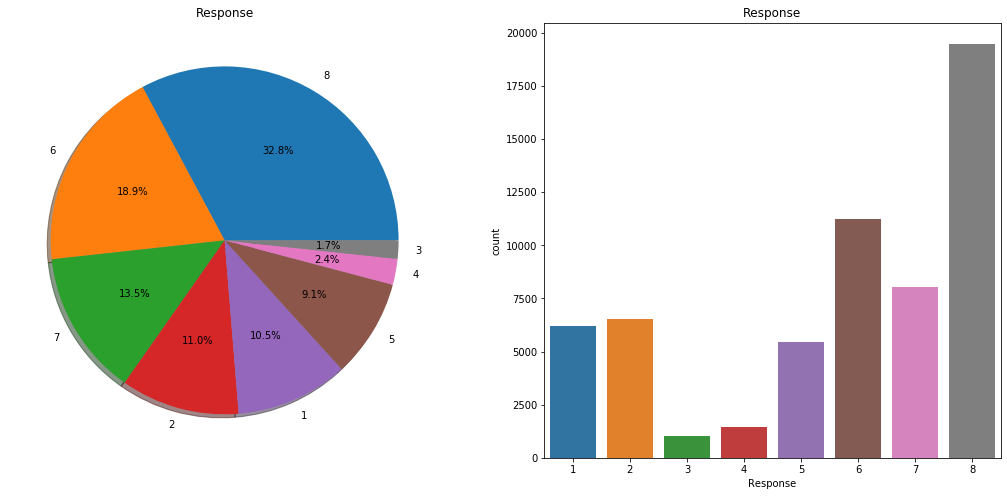

In [16]:
# ターゲットカラムとなる "Response" が trainデータにはどれぐらい格納されているか確認
# 3,4 のデータが圧倒的に少ないことは確認できた
# 8のデータが多いことも確認できる
# ※画像が表示されない場合は、再実行すると表示される場合がある
import matplotlib.pyplot as plt
import seaborn as sns
f,ax=plt.subplots(1,2,figsize=(18,8))
train_df['Response'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Response')
ax[0].set_ylabel('')
sns.countplot('Response',data=train_df,ax=ax[1])
ax[1].set_title('Response')
plt.show()

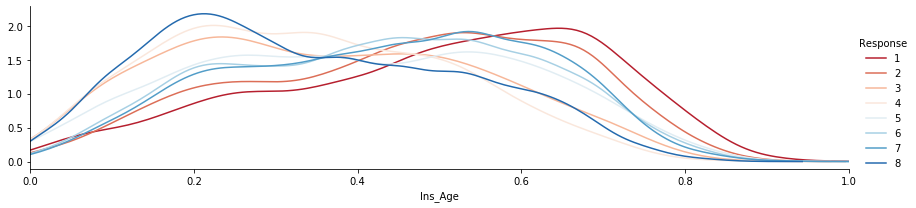

In [17]:
# 年齢とresponseの関係を見てみる
facet = sns.FacetGrid(train_df, hue="Response",aspect=4, hue_order=[1,2,3,4,5,6,7,8], palette="RdBu")
facet.map(sns.kdeplot,'Ins_Age')
facet.set(xlim=(0, train_df['Ins_Age'].max()))
facet.add_legend()

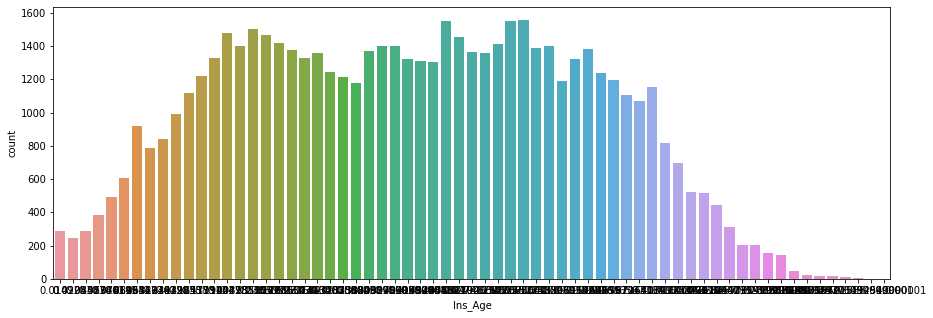

In [18]:
# 年齢の分布を確認する
fig, axis1 = plt.subplots(1,1,figsize=(15,5))
sns.countplot(x="Ins_Age",data=train_df, ax=axis1)

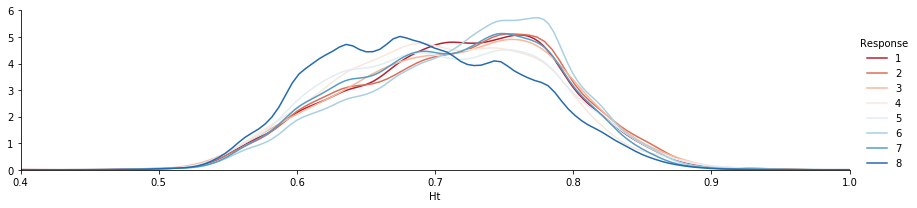

In [22]:
#身長 FacetGrid
facet = sns.FacetGrid(train_df, hue="Response",aspect=4, hue_order=[1,2,3,4,5,6,7,8], palette="RdBu")
facet.map(sns.kdeplot,'Ht')
facet.set(xlim=(0.4, train_df['Ht'].max())) 
facet.add_legend() 

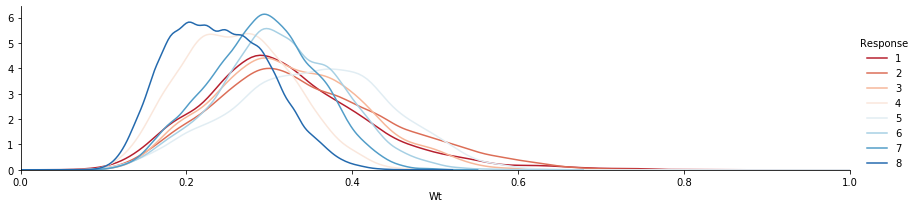

In [23]:
#体重 FacetGrid
facet = sns.FacetGrid(train_df, hue="Response",aspect=4, hue_order=[1,2,3,4,5,6,7,8], palette="RdBu")
facet.map(sns.kdeplot,'Wt')
facet.set(xlim=(0, train_df['Wt'].max()))
facet.add_legend()

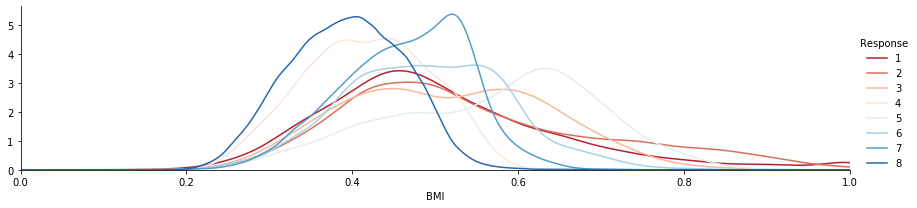

In [24]:
#BMI FacetGrid
facet = sns.FacetGrid(train_df, hue="Response",aspect=4, hue_order=[1,2,3,4,5,6,7,8], palette="RdBu")
facet.map(sns.kdeplot,'BMI')
facet.set(xlim=(0, 1.0))
facet.add_legend()

[(0, 1.1)]

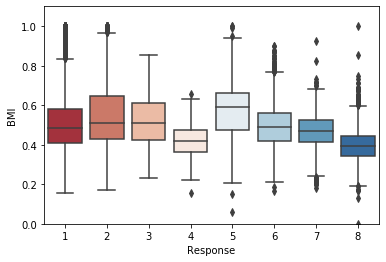

In [25]:
#BMI boxplot
ax = sns.boxplot(x="Response", y="BMI", data=train_df, 
                 order=[1,2,3,4,5,6,7,8], palette="RdBu")
ax.set(ylim=(0, 1.1))

- 年齢、身長、体重の数値は正規化や標準化されているが、responseとの関連性を見ると、若者とお年寄りなどの情報を加味した相関性がありそうに見える

Text(0, 0.5, 'Response')

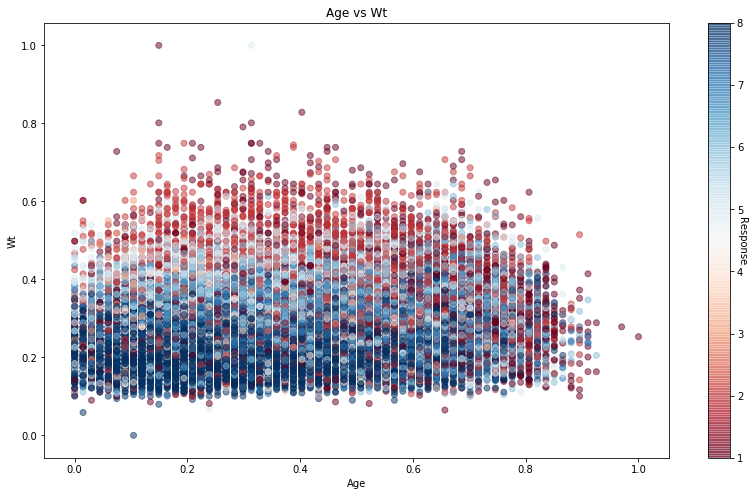

In [26]:
#Age vs weight
# Ageとweightを軸に配置し、responseとの相関を確認する
# 正規化されているが、左下になるほどResponsenの値は8に近く、x, y軸にどちらに振れると
# Responsenの値がどんどん小さくなるように見受けられる
fig, ax = plt.subplots(1,1,figsize=(14,8))
cm = plt.cm.get_cmap('RdBu')
ax = plt.scatter(train_df["Ins_Age"], train_df["Wt"], c=train_df["Response"], alpha=0.5, cmap=cm)
plt.xlim=(0, 1.0)
plt.ylim=(0, 1.0)

plt.title("Age vs Wt")
plt.xlabel("Age")
plt.ylabel("Wt")

cbar=plt.colorbar(ax)
cbar.ax.set_ylabel('Response', rotation=270)

Text(0, 0.5, 'Response')

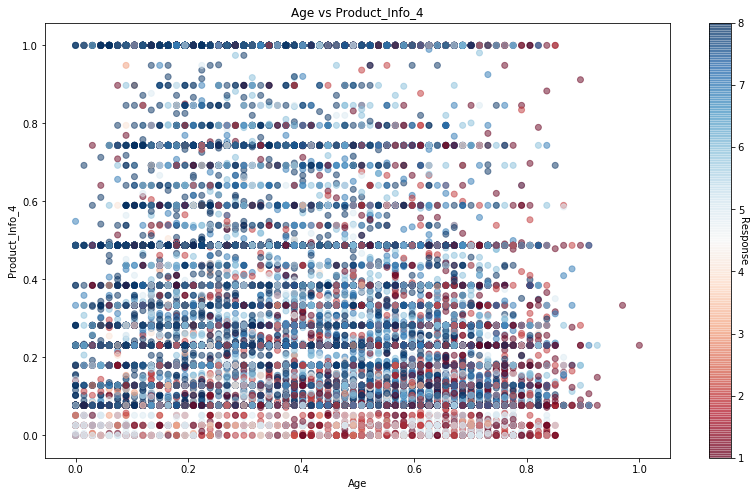

In [28]:
# 他のカラムと入れ替えて実施してみよう
# 少し時間を取るので、他のカラム名などに変更して実施してみてください
# Ins_Age や Product_Info_4となっている部分を書き換えればOKです（カラム名などはtrain.csvなどで確認してもらってもＯＫです）
fig, ax = plt.subplots(1,1,figsize=(14,8))
cm = plt.cm.get_cmap('RdBu')
ax = plt.scatter(train_df["Ins_Age"], train_df["Product_Info_4"], c=train_df["Response"], alpha=0.5, cmap=cm)
plt.xlim=(0, 1.0)
plt.ylim=(0, 1.0)

plt.title("Age vs Product_Info_4")
plt.xlabel("Age")
plt.ylabel("Product_Info_4")

cbar=plt.colorbar(ax)
cbar.ax.set_ylabel('Response', rotation=270)

In [29]:
# 他に相関を確認する方法として
# Responseに対して、対象カラムの平均値を取得しているだけなので、単純な相関であれば
# 0-8が順番で表示される、または、8-0の逆順で表示されるなどが考えられる。
# 3,4がサンプル数がもともと少ないことはあるので、そのあたり影響している可能性も高い
# このような情報をもって、どれぐらい前処理が必要か検討していきます。
train_df[['Ins_Age', 'Response']].groupby(['Response'], as_index=False).mean().sort_values(by='Ins_Age', ascending=False)

,Response,Ins_Age
0,1,0.492908
1,2,0.460992
6,7,0.434459
5,6,0.426265
4,5,0.404595
2,3,0.359476
7,8,0.342974
3,4,0.337033


### データの前処理（欠損対応）
- 上記の簡単な可視化の結果をもって、前処理対応を実施してみる
- また機械学習のモデルを構築していくにあたって、学習に不要なデータは削除していく

In [30]:
##  はじめに"Id" のカラムを削除する（学習には不要であるため） 

train_df.drop(columns=['Id'],axis=1, inplace=True)
test_df.drop(columns=['Id'],axis=1, inplace=True)

## trainデータのターゲットラベルは保存しておく 
y = train_df['Response'].reset_index(drop=True)

In [31]:
## 欠損値などを確認するために、trainとtestを一旦マージしてしまう
all_data = pd.concat((train_df, test_df)).reset_index(drop = True)
## ターゲットラベルはyに保存したので、一旦削除する
all_data.drop(['Response'], axis = 1, inplace = True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [32]:
# 欠損値の数をパーセンテージで出力する関数
def missing_percentage(df):
    total = df.isnull().sum().sort_values(ascending = False)[df.isnull().sum().sort_values(ascending = False) != 0]
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)[round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2) != 0]
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

In [33]:
# 結合したデータの欠損状況を調べる
# Medical_History_10は1%しか埋まってないという形(99%はnullな状態)
pd.set_option('display.max_rows', 20)
missing_percentage(all_data)

,Total,Percent
Medical_History_10,78388,99.04
Medical_History_32,77688,98.16
Medical_History_24,74165,93.71
Medical_History_15,59460,75.13
Family_Hist_5,55435,70.04
Family_Hist_3,45305,57.24
Family_Hist_2,38536,48.69
Insurance_History_5,33501,42.33
Family_Hist_4,25861,32.68
Employment_Info_6,14641,18.50


In [34]:
#　欠損のあるMedical_HIstoryについて状態を再度確認してみる
all_data[['Medical_History_1','Medical_History_10','Medical_History_15','Medical_History_24','Medical_History_32']].describe()

,Medical_History_1,Medical_History_10,Medical_History_15,Medical_History_24,Medical_History_32
count,67285.000000,758.000000,19686.000000,4981.000000,1458.000000
mean,7.928572,143.426121,124.240221,50.449709,11.718107
std,12.912942,106.499108,98.668380,77.921630,38.257761
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,9.250000,18.000000,1.000000,0.000000
50%,4.000000,225.000000,117.000000,8.000000,0.000000
75%,9.000000,240.000000,240.000000,63.000000,2.000000
max,240.000000,240.000000,240.000000,240.000000,240.000000


In [35]:
# ここでは一旦変数として重要ではないと判断して、削除してみる
# 値の幅としては0~240であり、欠損数が多いと補完してもそのデータ自体がゴミになりかねない
all_data.drop(['Medical_History_1'], axis = 1, inplace = True)
all_data.drop(['Medical_History_10'], axis = 1, inplace = True)
all_data.drop(['Medical_History_15'], axis = 1, inplace = True)
all_data.drop(['Medical_History_24'], axis = 1, inplace = True)
all_data.drop(['Medical_History_32'], axis = 1, inplace = True)

In [36]:
# 欠損のあるFamily_Histについて、データ状態を再度確認してみる
all_data[['Family_Hist_2','Family_Hist_3','Family_Hist_4','Family_Hist_5']].describe()

,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5
count,40610.000000,33841.000000,53285.000000,23711.000000
mean,0.474554,0.498315,0.445338,0.486604
std,0.154993,0.140164,0.163434,0.129180
min,0.000000,0.000000,0.000000,0.000000
25%,0.362319,0.411765,0.323944,0.410714
50%,0.463768,0.519608,0.436620,0.508929
75%,0.579710,0.607843,0.563380,0.580357
max,1.000000,1.000000,1.000000,1.000000


In [37]:
# Family_Histは欠損数はMedicalに比べていくらかマシであり、カーディナリティも高いほうなおで、平均値で補完する
all_data['Family_Hist_2'].fillna(all_data['Family_Hist_3'].mean(), inplace=True)
all_data['Family_Hist_3'].fillna(all_data['Family_Hist_3'].mean(), inplace=True)
all_data['Family_Hist_4'].fillna(all_data['Family_Hist_3'].mean(), inplace=True)
all_data['Family_Hist_5'].fillna(all_data['Family_Hist_3'].mean(), inplace=True)

In [38]:
# 欠損のあるEmployment_Infoについて、データ状態を再度確認してみる
all_data[['Employment_Info_1','Employment_Info_4','Employment_Info_6']].describe()

,Employment_Info_1,Employment_Info_4,Employment_Info_6
count,79124.000000,70230.000000,64505.000000
mean,0.077930,0.006340,0.363228
std,0.082746,0.033368,0.350589
min,0.000000,0.000000,0.000000
25%,0.035000,0.000000,0.060000
50%,0.060000,0.000000,0.250000
75%,0.100000,0.000000,0.580000
max,1.000000,1.000000,1.000000


In [39]:
# こちらも同じく一旦平均値補完
all_data['Employment_Info_1'].fillna(all_data['Employment_Info_1'].mean(), inplace=True)
all_data['Employment_Info_4'].fillna(all_data['Employment_Info_4'].mean(), inplace=True)
all_data['Employment_Info_6'].fillna(all_data['Employment_Info_6'].mean(), inplace=True)

In [40]:
# 欠損のあるInsurance_Historyについて、データ状態を再度確認してみる
all_data[['Insurance_History_5']].describe()

,Insurance_History_5
count,45645.000000
mean,0.001710
std,0.006465
min,0.000000
25%,0.000400
50%,0.000933
75%,0.002000
max,1.000000


In [41]:
# こちらも同じく一旦平均値補完
all_data['Insurance_History_5'].fillna(all_data['Insurance_History_5'].mean(), inplace=True)

In [42]:
# これで欠損値の補完対応は完了したので、再度関数を呼び出してチェックする
#（出力がなければOK、一旦欠損データはなくなったということ）
missing_percentage(all_data)

,Total,Percent


In [43]:
# 確認
all_data.head()

,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Ht,Ins_Age,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_2,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_3,Medical_History_30,Medical_History_31,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_4,Medical_History_40,Medical_History_41,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_Keyword_1,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_2,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_3,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_4,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Wt
0,0.323008,0.028,12,1,0.0,3,0.363228,2,0.498315,0.598039,0.498315,0.526786,0.581818,0.641791,1,1,3,1,0.000667,1,1,2,1,2,6,3,1,2,1,3,2,3,3,3,3,1,1,112,2,1,2,3,1,3,3,1,3,2,2,3,1,3,1,2,2,1,3,1,3,3,1,3,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,D3,10,0.076923,2,1,1,0.148536
1,0.272288,0.000,1,3,0.0,2,0.001800,2,0.188406,0.498315,0.084507,0.498315,0.600000,0.059701,2,1,3,1,0.000133,1,3,2,1,2,6,3,1,2,1,3,2,3,3,1,3,1,1,412,2,1,2,3,1,3,3,1,3,2,2,3,3,1,1,2,2,1,3,1,3,1,1,3,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,A1,26,0.076923,2,3,1,0.131799
2,0.428780,0.030,9,1,0.0,2,0.030000,3,0.304348,0.498315,0.225352,0.498315,0.745455,0.029851,2,1,1,3,0.001710,3,2,3,1,2,8,3,1,1,1,3,2,3,3,1,3,1,1,3,2,1,2,3,2,2,3,1,3,2,2,3,3,3,1,3,2,1,3,2,3,1,1,3,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,E1,26,0.076923,2,3,1,0.288703
3,0.352438,0.042,9,1,0.0,3,0.200000,3,0.420290,0.498315,0.352113,0.498315,0.672727,0.164179,2,1,1,3,0.001710,3,2,3,2,2,8,3,1,2,1,3,2,3,3,1,3,1,1,350,2,2,2,3,1,3,3,1,3,2,2,3,3,3,1,2,2,1,3,2,3,1,1,3,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,D4,10,0.487179,2,3,1,0.205021
4,0.424046,0.027,9,1,0.0,2,0.050000,2,0.463768,0.498315,0.408451,0.498315,0.654545,0.417910,2,1,1,3,0.001710,3,2,3,1,2,6,3,1,2,1,3,2,3,3,1,3,1,1,162,2,1,2,3,2,2,3,1,3,2,2,3,3,3,1,3,2,1,3,2,3,1,1,3,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,D2,26,0.230769,2,3,1,0.234310


In [44]:
# one-hot-vector化
# カラムの値を 0 or 1で表すように変更する
categorical=['Product_Info_1', 'Product_Info_2', 'Product_Info_3', 'Product_Info_5', 'Product_Info_6', 'Product_Info_7', 
             'Employment_Info_2', 'Employment_Info_3', 'Employment_Info_5', 'InsuredInfo_1', 'InsuredInfo_2', 'InsuredInfo_3', 
             'InsuredInfo_4', 'InsuredInfo_5', 'InsuredInfo_6', 'InsuredInfo_7', 'Insurance_History_1', 'Insurance_History_2', 
             'Insurance_History_3', 'Insurance_History_4', 'Insurance_History_7', 'Insurance_History_8', 'Insurance_History_9', 
             'Family_Hist_1', 'Medical_History_2', 'Medical_History_3', 'Medical_History_4', 'Medical_History_5', 'Medical_History_6', 
             'Medical_History_7', 'Medical_History_8', 'Medical_History_9', 'Medical_History_11', 'Medical_History_12', 
             'Medical_History_13', 'Medical_History_14', 'Medical_History_16', 'Medical_History_17', 'Medical_History_18', 
             'Medical_History_19', 'Medical_History_20', 'Medical_History_21', 'Medical_History_22', 'Medical_History_23', 
             'Medical_History_25', 'Medical_History_26', 'Medical_History_27', 'Medical_History_28', 'Medical_History_29', 
             'Medical_History_30', 'Medical_History_31', 'Medical_History_33', 'Medical_History_34', 'Medical_History_35', 
             'Medical_History_36', 'Medical_History_37', 'Medical_History_38', 'Medical_History_39', 
             'Medical_History_40', 'Medical_History_41']
## Creating dummy variable 
final_features = pd.get_dummies(all_data, columns=categorical).reset_index(drop=True)
final_features.shape

(79146, 947)

In [45]:
# 例えば Medical_History_41 が Medical_History_41_1, Medical_History_41_2, Medical_History_41_3の3カラムになっている
# これは1-3の3種の値を取りうる可能性があり、該当したカラムには1を、該当しなかったものには0を設定するようにしている
final_features.head()

,BMI,Employment_Info_1,Employment_Info_4,Employment_Info_6,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Ht,Ins_Age,Insurance_History_5,Medical_Keyword_1,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_2,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_3,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_4,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Product_Info_4,Wt,Product_Info_1_1,Product_Info_1_2,...,Medical_History_18_3,Medical_History_19_1,Medical_History_19_2,Medical_History_19_3,Medical_History_20_1,Medical_History_20_2,Medical_History_20_3,Medical_History_21_1,Medical_History_21_2,Medical_History_21_3,Medical_History_22_1,Medical_History_22_2,Medical_History_23_1,Medical_History_23_2,Medical_History_23_3,Medical_History_25_1,Medical_History_25_2,Medical_History_25_3,Medical_History_26_1,Medical_History_26_2,Medical_History_26_3,Medical_History_27_1,Medical_History_27_2,Medical_History_27_3,Medical_History_28_1,Medical_History_28_2,Medical_History_28_3,Medical_History_29_1,Medical_History_29_2,Medical_History_29_3,Medical_History_30_1,Medical_History_30_2,Medical_History_30_3,Medical_History_31_1,Medical_History_31_2,Medical_History_31_3,Medical_History_33_1,Medical_History_33_2,Medical_History_33_3,Medical_History_34_1,Medical_History_34_2,Medical_History_34_3,Medical_History_35_1,Medical_History_35_2,Medical_History_35_3,Medical_History_36_1,Medical_History_36_2,Medical_History_36_3,Medical_History_37_1,Medical_History_37_2,Medical_History_37_3,Medical_History_38_1,Medical_History_38_2,Medical_History_38_3,Medical_History_39_1,Medical_History_39_2,Medical_History_39_3,Medical_History_40_1,Medical_History_40_2,Medical_History_40_3,Medical_History_41_1,Medical_History_41_2,Medical_History_41_3
0,0.323008,0.028,0.0,0.363228,0.498315,0.598039,0.498315,0.526786,0.581818,0.641791,0.000667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.076923,0.148536,1,0,...,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1
1,0.272288,0.000,0.0,0.001800,0.188406,0.498315,0.084507,0.498315,0.600000,0.059701,0.000133,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.076923,0.131799,1,0,...,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0
2,0.428780,0.030,0.0,0.030000,0.304348,0.498315,0.225352,0.498315,0.745455,0.029851,0.001710,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.076923,0.288703,1,0,...,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0
3,0.352438,0.042,0.0,0.200000,0.420290,0.498315,0.352113,0.498315,0.672727,0.164179,0.001710,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.487179,0.205021,1,0,...,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0
4,0.424046,0.027,0.0,0.050000,0.463768,0.498315,0.408451,0.498315,0.654545,0.417910,0.001710,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.230769,0.234310,1

In [46]:
# concanate(結合）していたデータをtrainとtestの粒度に戻す
X = final_features.iloc[:len(y), :]
X_sub = final_features.iloc[len(y):, :]

In [47]:
# 各カラムの中で出願回数が最も多い要素が要素全体に対して70%の割合を占めるようなカラムは
#　偏りがより強くなるだけなので、今回は削除してみる
# 学習時間の関係上70%以上とそれなりの頻出度でも削除している。このあたりは試行錯誤も必要
def overfit_reducer(df):

    overfit = []
    for i in df.columns:
        counts = df[i].value_counts()
        zeros = counts.iloc[0]
        if zeros / len(df) * 100 > 70:
            overfit.append(i)
    overfit = list(overfit)
    return overfit


overfitted_features = overfit_reducer(X)

X = X.drop(overfitted_features, axis=1)
X_sub = X_sub.drop(overfitted_features, axis=1)

In [48]:
# 要素として947列の情報を持っていた内容が 30列まで圧縮された
X.shape

(59381, 30)

In [50]:
X.head()

,BMI,Employment_Info_1,Employment_Info_6,Family_Hist_2,Family_Hist_3,Family_Hist_4,Ht,Ins_Age,Insurance_History_5,Product_Info_4,Wt,Employment_Info_2_9,InsuredInfo_3_8,InsuredInfo_6_1,InsuredInfo_6_2,Insurance_History_3_1,Insurance_History_3_3,Insurance_History_4_1,Insurance_History_4_3,Insurance_History_7_1,Insurance_History_7_3,Insurance_History_8_2,Insurance_History_8_3,Insurance_History_9_2,Insurance_History_9_3,Family_Hist_1_3,Medical_History_4_1,Medical_History_4_2,Medical_History_41_1,Medical_History_41_3
0,0.323008,0.028,0.363228,0.498315,0.598039,0.498315,0.581818,0.641791,0.000667,0.076923,0.148536,0,0,0,1,0,1,1,0,1,0,0,0,1,0,0,1,0,0,1
1,0.272288,0.000,0.001800,0.188406,0.498315,0.084507,0.600000,0.059701,0.000133,0.076923,0.131799,0,0,0,1,0,1,1,0,1,0,0,1,1,0,0,1,0,1,0
2,0.428780,0.030,0.030000,0.304348,0.498315,0.225352,0.745455,0.029851,0.001710,0.076923,0.288703,1,1,1,0,1,0,0,1,0,1,1,0,0,1,1,0,1,1,0
3,0.352438,0.042,0.200000,0.420290,0.498315,0.352113,0.672727,0.164179,0.001710,0.487179,0.205021,1,1,0,1,1,0,0,1,0,1,1,0,0,1,1,0,1,1,0
4,0.424046,0.027,0.050000,0.463768,0.498315,0.408451,0.654545,0.417910,0.001710,0.230769,0.234310,1,0,0,1,1,0,0,1,0,1,1,0,0,1,0,0,1,1,0


### モデルの構築

In [51]:
# モデル構築にあたり必要なライブラリをインポートする
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [52]:
#　学習データをバリデーションとテストに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 10)

In [53]:
# モデルの定義
LSC = LinearSVC(random_state=10)

In [54]:
# パラメータ（時間がかかるので1パラメータ）
parameters = {
    #'C':[1, 3, 5],
    'C':[1]
}

In [55]:
# 交差検証（3分割で実施、時間の関係上分割数を小さくしている）
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=10)

In [56]:
%%time
# グリッドサーチでパラメータチューニング
# 約30秒程度の想定
grid_search = GridSearchCV(LSC, parameters, n_jobs=4, cv=skf)
grid_search = grid_search.fit(X_train, y_train)
grid_search.best_estimator_

CPU times: user 15.9 s, sys: 48.8 ms, total: 15.9 s
Wall time: 32 s


LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=10, tol=0.0001,
          verbose=0)

In [57]:
grid_search.best_score_

0.4214742818649858

In [58]:
%%time
# ベストパラメータで再学習（普通学習の場合）
lr=LinearSVC(random_state=10, C=1)
lr.fit(X_train, y_train)

CPU times: user 16 s, sys: 0 ns, total: 16 s
Wall time: 16 s


LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=10, tol=0.0001,
          verbose=0)

In [59]:
#学習時のスコア
lr.score(X_train, y_train)

0.4231824086994178

In [60]:
#テストデータのスコア
lr.score(X_test, y_test)

0.4252596126859388

In [61]:
#提出データに対してpredict（responseが推測）されているかを確認する
lr.predict(X_sub)

array([8, 6, 6, ..., 6, 2, 6])

In [62]:
submission_lr = pd.read_csv("./sample_submission.csv")
submission_lr.iloc[:,1] = lr.predict(X_sub)

In [63]:
submission_lr.to_csv("submission_lr.csv", index=False)

### 出力されたsubmission_lr.csvをkaggleにアップロードすることで、精度を確認することができる

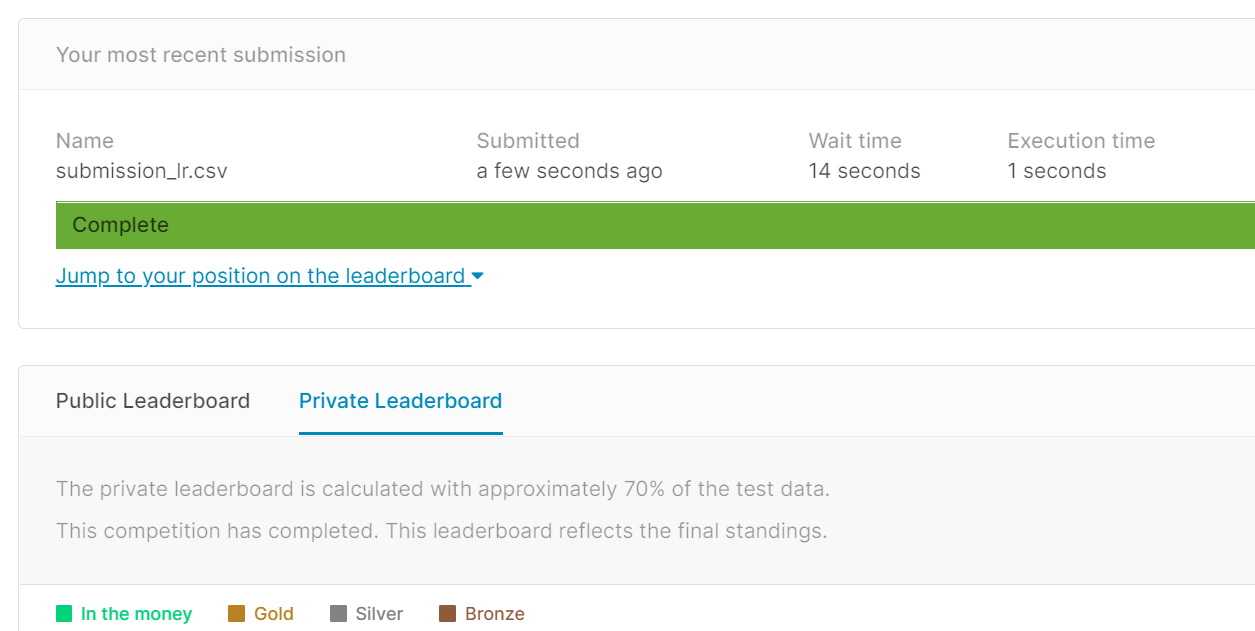

### day1のハンズオンはここまで
- 上記のファイルでは約30 ~ 40%程度の精度しか出ない
- このコンペで優勝したモデルは約67%の正解率を出すモデル
- データの前処理やパラメータの調整を入れることで、60％程度はLinear SVCでも精度は出る様子
- 優勝にあたっては勾配ブースティングモデルを使用したと思われる

### handsonを通して
- データの準備からモデルを作成するまで一連の流れについて、おおざっぱに理解していただいた
- handsonで実施した各作業について焦点をあてて説明を行っていく

### 以下はday2の残った時間などで実施(XGBoostを例にいかに簡単に使えて、精度が出るか)

In [ ]:
# ライブラリのインストール
!pip install xgboost

In [ ]:
# 学習用
xgb_train = xgb.DMatrix(X_train, label=y_train)

# テスト用
xgb_test = xgb.DMatrix(X_test, label=y_test)

In [ ]:
# パラメータの設定
xgb_params = {
    'objective': 'multi:softprob',  # 多値分類問題
    'num_class': 9,                 # 目的変数のクラス数
    'learning_rate': 0.1,           # 学習率
    'eval_metric': 'mlogloss'       # 学習用の指標 (Multiclass logloss)
}

In [ ]:
# 学習
import xgboost as xgb
evals = [(xgb_train, 'train')] # 学習に用いる検証用データ
evaluation_results = {}                            # 学習の経過を保存する箱
bst = xgb.train(xgb_params,                        # 上記で設定したパラメータ
                xgb_train,                         # 使用するデータセット
                num_boost_round=20,               # 学習の回数
                early_stopping_rounds=10,          # アーリーストッピング
                evals=evals,                       # 学習経過で表示する名称
                evals_result=evaluation_results,   # 上記で設定した検証用データ
                verbose_eval=10                    # 学習の経過の表示(10回毎)
                )

In [ ]:
# 予測
import numpy as np
# テストデータで予測
y_pred = bst.predict(xgb_test, ntree_limit=bst.best_ntree_limit)
y_pred_max = np.argmax(y_pred, axis=1)

# Accuracy の計算
acc = accuracy_score(y_test, y_pred_max)
print('Accuracy:', acc)